In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

# Load EEG data
eeg_file_path = '/home/naturaldx/auditory-eeg-challenge-2024-code/datasets/eeg/sub-001_ses-shortstories01_task-listeningActive_run-04_desc-preproc-audio-audiobook_1_eeg.npy'
eeg_data = np.load(eeg_file_path)

# Load events data
events_file_path = '/home/naturaldx/auditory-eeg-challenge-2024-code/datasets/events/sub-001_ses-shortstories01_task-listeningActive_run-04_events.tsv'
events_data = pd.read_csv(events_file_path, sep='\t')

# Load audio data
audio_file_path = '/home/naturaldx/auditory-eeg-challenge-2024-code/datasets/stimuli/audiobook_1.npz'
audio_data = dict(np.load(audio_file_path))
audio, fs = audio_data["audio"], audio_data["fs"]

# Load raw EEG data
raw_eeg_path = '/home/naturaldx/auditory-eeg-challenge-2024-code/datasets/eeg/sub-001_ses-shortstories01_task-listeningActive_run-04_eeg.bdf'
raw = mne.io.read_raw_bdf(raw_eeg_path, preload=True)

Extracting EDF parameters from /home/naturaldx/auditory-eeg-challenge-2024-code/datasets/eeg/sub-001_ses-shortstories01_task-listeningActive_run-04_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 980991  =      0.000 ...   957.999 secs...


In [25]:
# Print the length of the audio data
print('Audio data length: ', len(audio)/fs, 'seconds')

# Print the length of the EEG data
print('EEG data shape: ', eeg_data.shape)
print('EEG data length: ', eeg_data.shape[1]/64, 'seconds')

# Print the length of the raw EEG data
sr = raw.info['sfreq']
length = raw.n_times
print('Raw EEG data sampling rate: ', sr, 'Hz')
print('Raw EEG data length: ', length/sr, 'seconds')

# Print the length of the events data
events_data.head()

Audio data length:  936.8293958333334 seconds
EEG data shape:  (64, 60096)
EEG data length:  939.0 seconds
Raw EEG data sampling rate:  1024.0 Hz
Raw EEG data length:  958.0 seconds


,onset,duration,stim_file,trigger_file,noise_file,video_file,condition,snr
0,5.69,936.8,eeg/audiobook_1.npz.gz,eeg/t_audiobook_1.npz.gz,eeg/noise_audiobook_1.npz.gz,NaN,in_noise,100.0


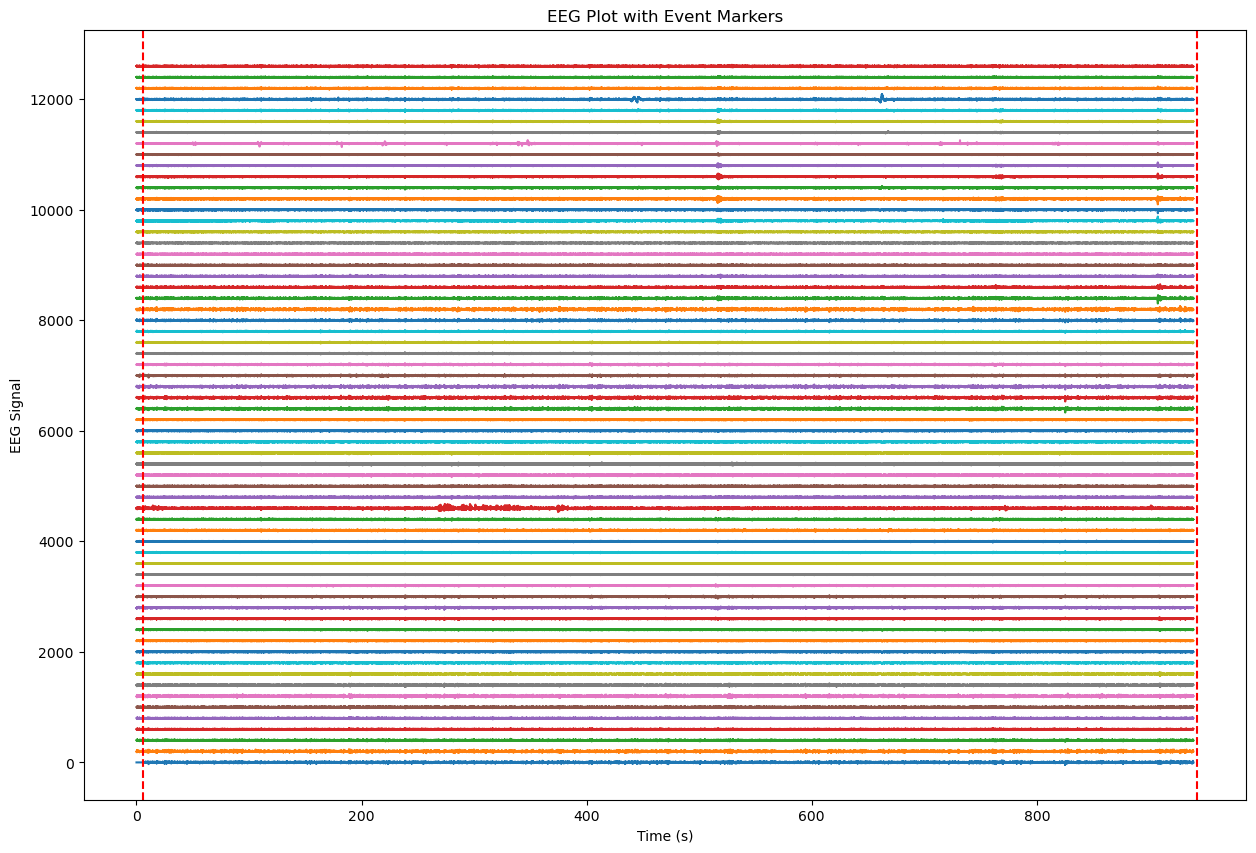

In [9]:
# Plotting the EEG data and marking the events

# The EEG data is a 2D array, we need to plot each channel separately.
# We'll assume each row in the EEG data represents a separate channel.
# We also need to plot markers at the event onsets.
# The 'onset' column in the events data represents the time at which each event occurs.

# Let's first define some parameters for the plot
num_channels = eeg_data.shape[0]  # Number of EEG channels
sampling_rate = 64  # Assuming a sampling rate of 64 Hz for EEG data
time_vector = np.arange(eeg_data.shape[1]) / sampling_rate  # Time vector in seconds

# Creating the plot
plt.figure(figsize=(15, 10))

# Plotting each channel
for i in range(num_channels):
    plt.plot(time_vector, eeg_data[i, :] + 200 * i, label=f'Channel {i+1}')  # Offset each channel for clarity

# Adding markers for events
onset = events_data['onset'].values
duration = events_data['duration'].values

plt.axvline(x=onset, color='r', linestyle='--')
plt.axvline(x=onset+duration, color='r', linestyle='--')

plt.xlabel('Time (s)')
plt.ylabel('EEG Signal')
plt.title('EEG Plot with Event Markers')
# plt.legend()
plt.show()
